Q. Write a program to implement Boosting and Bagging methods. Analyze using suitable dataset.

Importing necessary library

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,  confusion_matrix, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

Load the dataset and displaying head of the dataset.

In [3]:
df = pd.read_csv('Almond.csv')
df.head()

Unnamed: 0  Length (major axis)  Width (minor axis)  Thickness (depth)  \
0           0                  NaN          227.940628         127.759132   
1           1                  NaN          234.188126         128.199509   
2           2                  NaN          229.418610         125.796547   
3           3                  NaN          232.763153         125.918808   
4           4                  NaN          230.150742         107.253448   

      Area   Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  \
0  22619.0  643.813269        NaN  0.973384     1.458265           NaN   
1  23038.0  680.984841        NaN  0.957304     1.601844           NaN   
2  22386.5  646.943212        NaN  0.967270     1.487772           NaN   
3  22578.5  661.227483        NaN  0.965512     1.540979           NaN   
4  19068.0  624.842706        NaN  0.951450     1.629395           NaN   

   Eccentricity    Extent  Convex hull(convex area)   Type  
0           NaN  0.681193                   23237.5  MAMRA  
1           NaN  0.656353                   24065.5  MAMRA  
2           NaN  0.683620                   23144.0  MAMRA  
3           NaN  0.685360                   23385.0  MAMRA  
4           NaN  0.714800                   20041.0  MAMRA

Displaying info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2803 non-null   int64  
 1   Length (major axis)       1946 non-null   float64
 2   Width (minor axis)        1861 non-null   float64
 3   Thickness (depth)         1799 non-null   float64
 4   Area                      2803 non-null   float64
 5   Perimeter                 2803 non-null   float64
 6   Roundness                 1946 non-null   float64
 7   Solidity                  2803 non-null   float64
 8   Compactness               2803 non-null   float64
 9   Aspect Ratio              1004 non-null   float64
 10  Eccentricity              1004 non-null   float64
 11  Extent                    2803 non-null   float64
 12  Convex hull(convex area)  2803 non-null   float64
 13  Type                      2803 non-null   object 
dtypes: float

Checking for null values

In [6]:
df.isnull().sum()

Unnamed: 0                     0
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64

Plotting Null values 

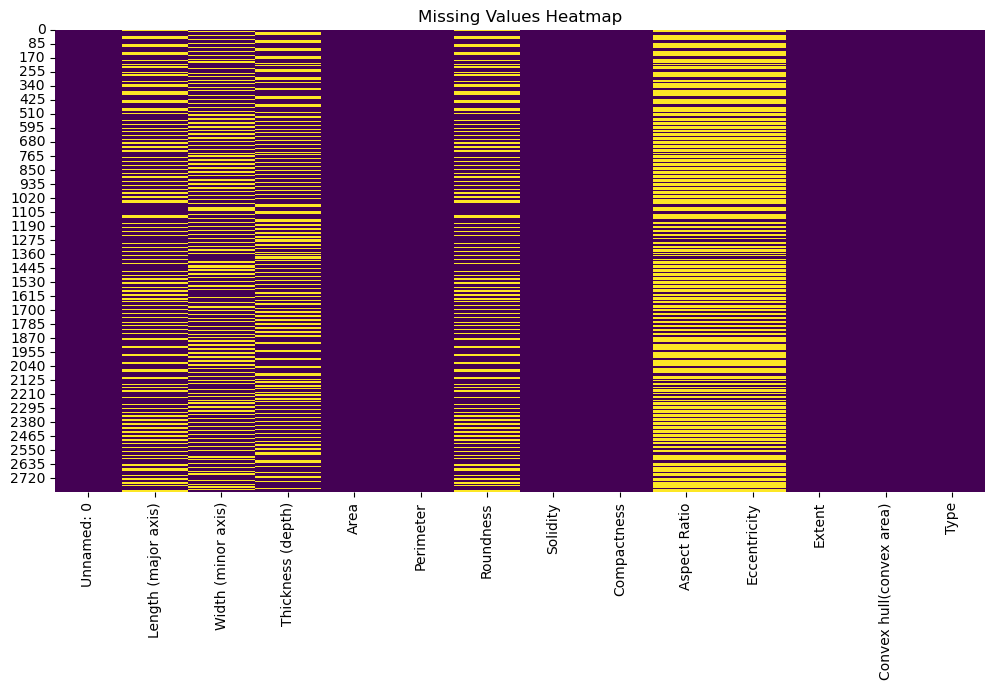

(        Unnamed: 0  Length (major axis)  Width (minor axis)  \
 count  2803.000000          1946.000000         1861.000000   
 mean   1401.000000           290.609274          171.025915   
 std     809.300727            62.719433           29.916529   
 min       0.000000           151.335266           88.050529   
 25%     700.500000           245.966293          149.453659   
 50%    1401.000000           279.879883          170.168365   
 75%    2101.500000           330.508575          190.640427   
 max    2802.000000           515.352478          258.569794   
 
        Thickness (depth)          Area    Perimeter    Roundness     Solidity  \
 count        1799.000000   2803.000000  2803.000000  1946.000000  2803.000000   
 mean          109.705378  26511.117374   743.863770     0.470466     0.955828   
 std            18.940597  13782.561344   230.632076     0.118673     0.039596   
 min            59.494278   6037.000000   311.563489     0.173748     0.718772   
 25%        

In [9]:
# Plotting missing values heatmap
plt.figure(figsize=(12, 6))
sns.heatmap (df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Summary statistics
summary_stats = df.describe()

# Distribution of the 'Type' column
type_distribution = df['Type'].value_counts()

summary_stats, type_distribution

Handling missing values by filling with the mean (imputation)  
Pairplot for visualizing relationships between features and 'Type'

d:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


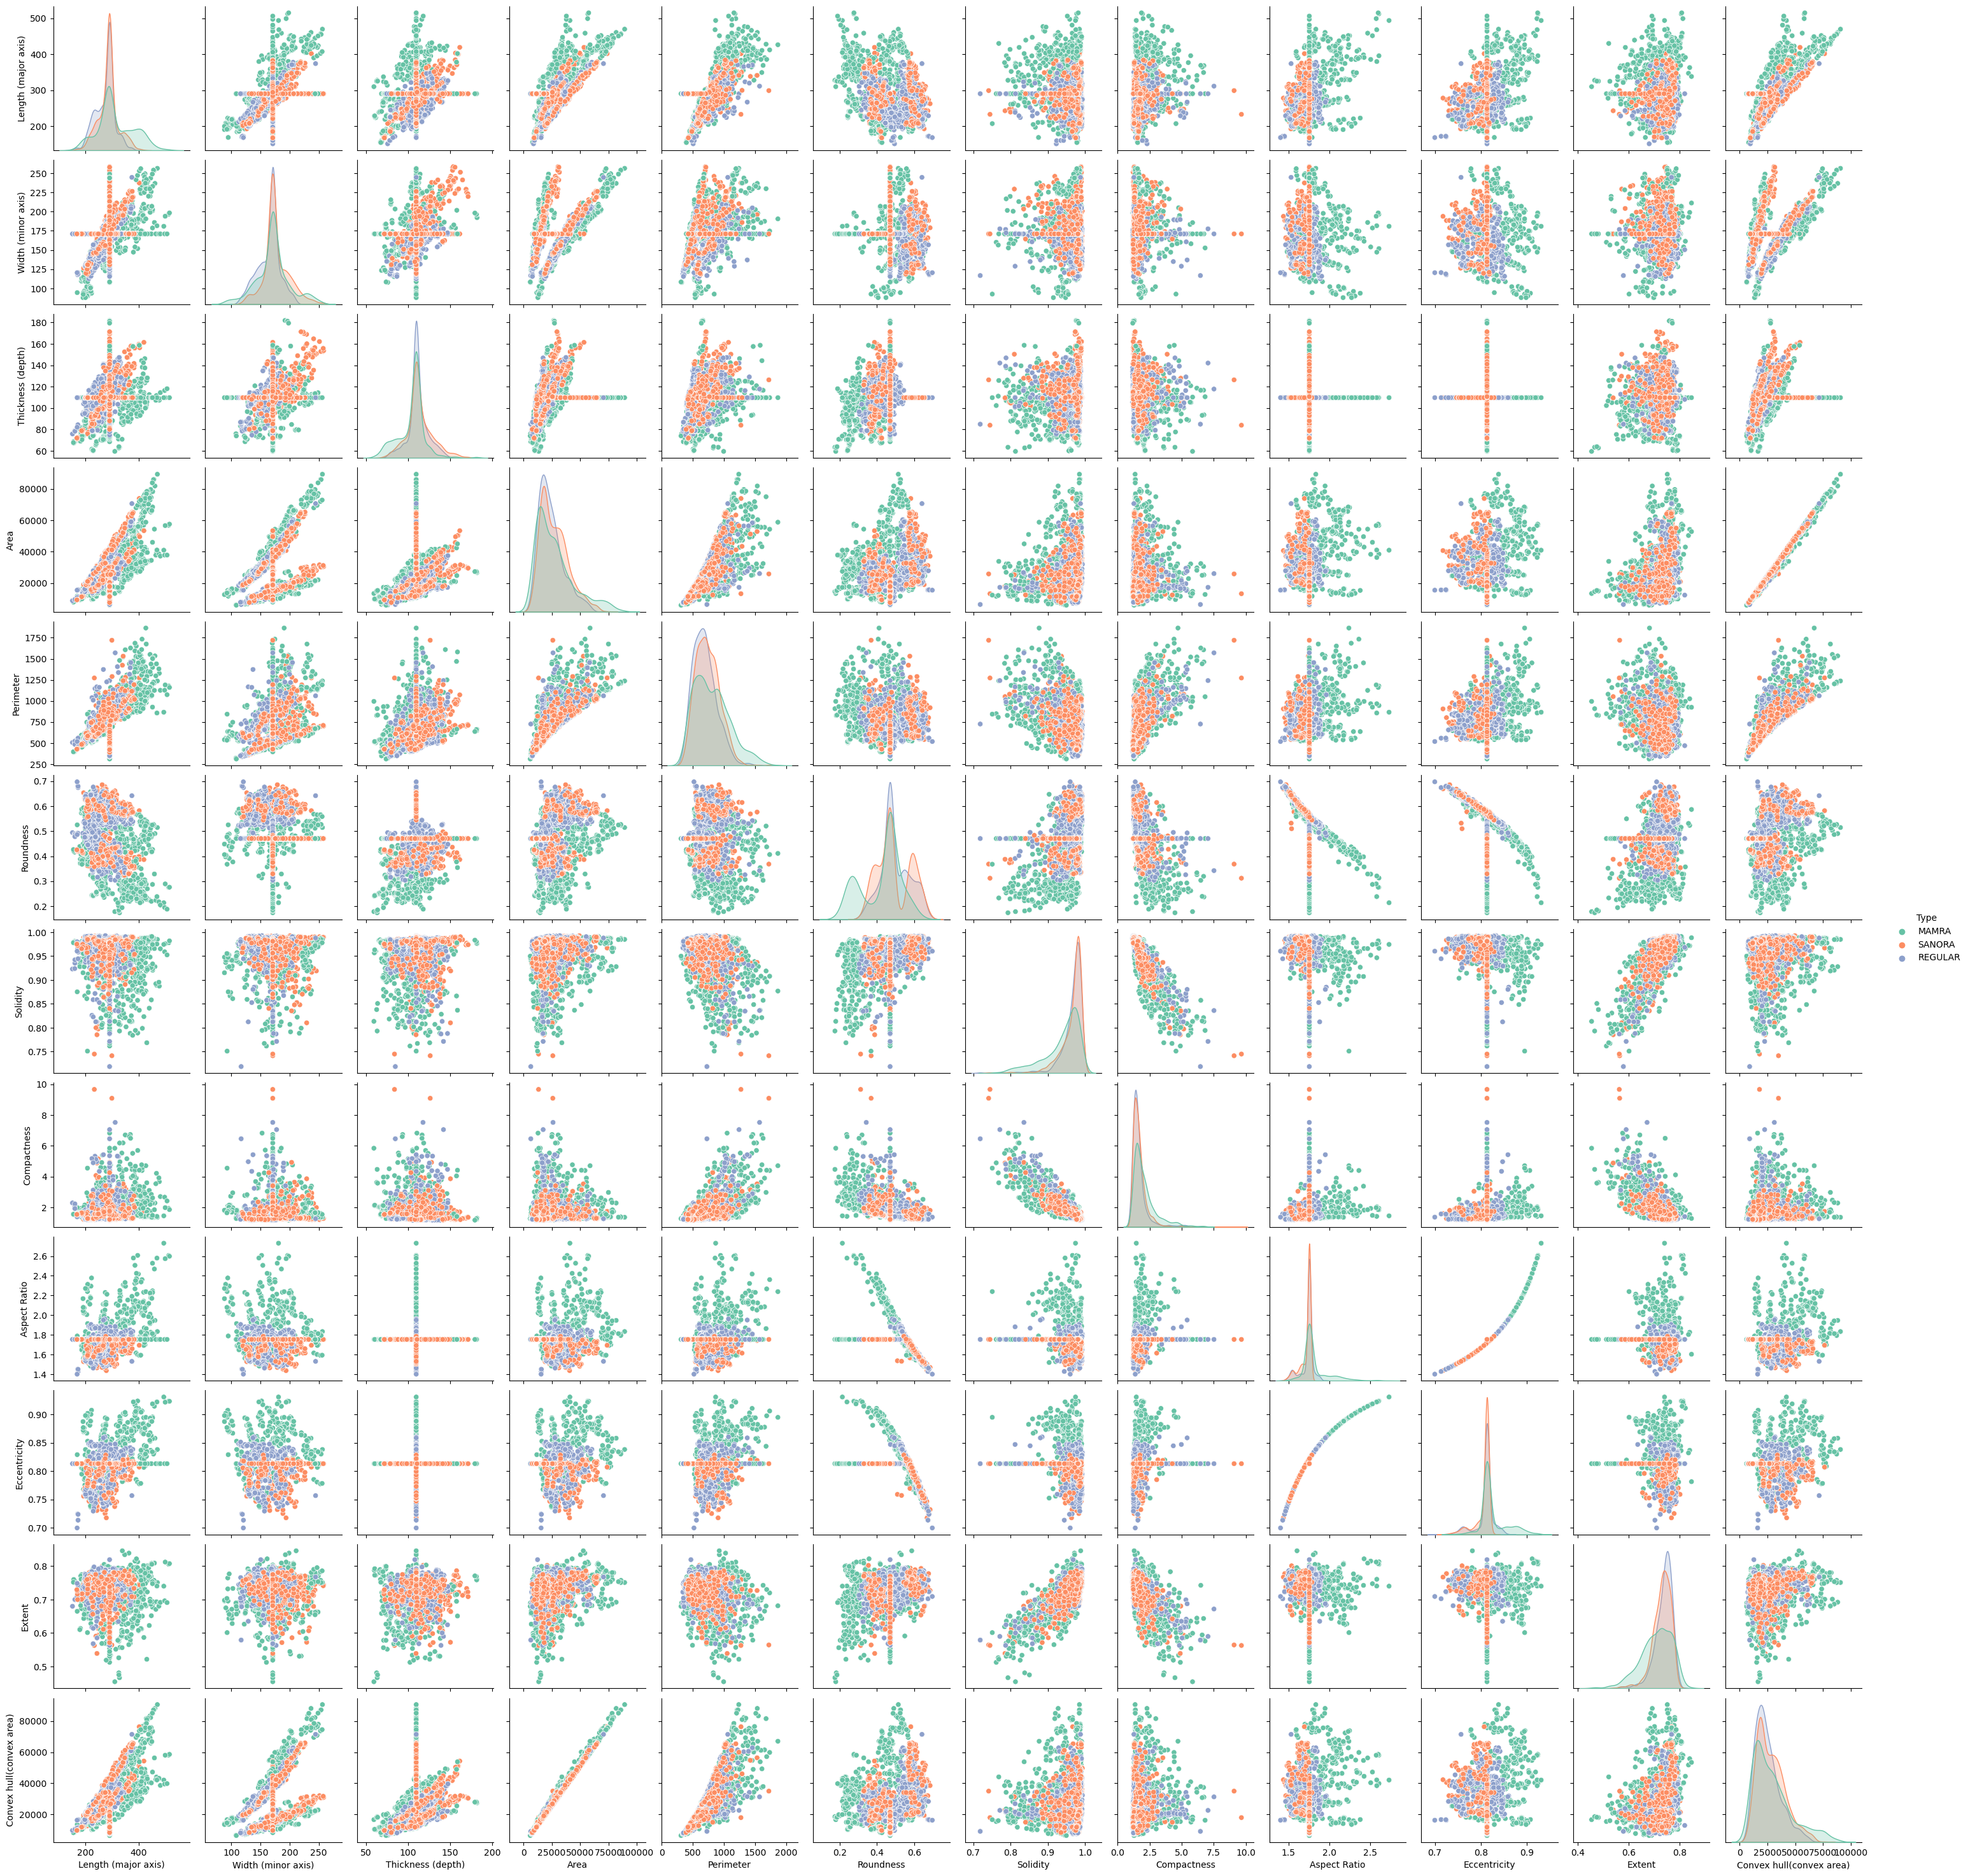

In [10]:
data_filled = df.copy()
columns_with_missing_values = ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Roundness', 'Aspect Ratio', 'Eccentricity']

for col in columns_with_missing_values:
    data_filled[col].fillna(data_filled[col].mean(), inplace=True)

data_cleaned = data_filled.drop(columns=['Unnamed: 0'])

sns.pairplot(data_cleaned, hue='Type', diag_kind='kde', palette='Set2')
plt.show()

Displaying head of the cleaned dataset

In [16]:
data_cleaned.head()

Length (major axis)  Width (minor axis)  Thickness (depth)     Area  \
0           290.609274          227.940628         127.759132  22619.0   
1           290.609274          234.188126         128.199509  23038.0   
2           290.609274          229.418610         125.796547  22386.5   
3           290.609274          232.763153         125.918808  22578.5   
4           290.609274          230.150742         107.253448  19068.0   

    Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0  643.813269   0.470466  0.973384     1.458265      1.753216      0.813114   
1  680.984841   0.470466  0.957304     1.601844      1.753216      0.813114   
2  646.943212   0.470466  0.967270     1.487772      1.753216      0.813114   
3  661.227483   0.470466  0.965512     1.540979      1.753216      0.813114   
4  624.842706   0.470466  0.951450     1.629395      1.753216      0.813114   

     Extent  Convex hull(convex area)   Type  
0  0.681193                   23237.5  MAMRA  
1  0.656353                   24065.5  MAMRA  
2  0.683620                   23144.0  MAMRA  
3  0.685360                   23385.0  MAMRA  
4  0.714800                   20041.0  MAMRA

Displaying info of the cleaned dataset

In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Length (major axis)       2803 non-null   float64
 1   Width (minor axis)        2803 non-null   float64
 2   Thickness (depth)         2803 non-null   float64
 3   Area                      2803 non-null   float64
 4   Perimeter                 2803 non-null   float64
 5   Roundness                 2803 non-null   float64
 6   Solidity                  2803 non-null   float64
 7   Compactness               2803 non-null   float64
 8   Aspect Ratio              2803 non-null   float64
 9   Eccentricity              2803 non-null   float64
 10  Extent                    2803 non-null   float64
 11  Convex hull(convex area)  2803 non-null   float64
 12  Type                      2803 non-null   object 
dtypes: float64(12), object(1)
memory usage: 284.8+ KB


Encoding Categorical data.

In [32]:
le = LabelEncoder()
for column in data_cleaned.columns:
    data_cleaned[column] = le.fit_transform(data_cleaned[column])

Displaying Head after converting

In [34]:
data_cleaned.head(20)

Length (major axis)  Width (minor axis)  Thickness (depth)  Area  \
0                  1138                1780               1525  1316   
1                  1138                1808               1539  1334   
2                  1138                1788               1467  1306   
3                  1138                1800               1473  1315   
4                  1138                1792                781  1020   
5                  1138                1796                801  1052   
6                  1138                1770                752   965   
7                  1138                1769                594   902   
8                  1852                 947               1684  2384   
9                  1865                 947               1566  2360   
10                 1885                 947               1411  2315   
11                 1860                 947               1601  2389   
12                 1718                 947                534  1771   
13                 1673                 947                473  1680   
14                 1651                 947                496  1644   
15                 1663                 947                417  1621   
16                 1364                 903                873  2280   
17                 1384                 886                873  2288   
18                 1399                 883                873  2306   
19                 1375                 870                873  2299   

    Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
0        1051        961      1518         1068           622           541   
1        1248        961       974         1478           622           541   
2        1069        961      1285         1153           622           541   
3        1141        961      1217         1291           622           541   
4         967        961       839         1559           622           541   
5         915        961       975         1345           622           541   
6         905        961       945         1515           622           541   
7         762        961      1343         1198           622           541   
8        2566        228       828         2350           622           541   
9        2500        204       934         2252           622           541   
10       2459        166       933         2234           622           541   
11       2606        221       808         2419           622           541   
12       2087        116      1007         2261           622           541   
13       2023        117      1038         2272           622           541   
14       2069        125       911         2347           622           541   
15       1978        114      1340         2253           622           541   
16       1912       1052      2279          950           780           780   
17       1909       1034      2013          886           812           812   
18       1929       1019      2205          905           818           818   
19       1943       1064      2165          961           811           811   

    Extent  Convex hull(convex area)  Type  
0      420                      1292     0  
1      234                      1335     0  
2      443                      1286     0  
3      468                      1303     0  
4      931                      1005     0  
5     1216                      1023     0  
6     1215                       932     0  
7     1586                       846     0  
8     2374                      2384     0  
9     2135                      2362     0  
10    2474                      2331     0  
11    1822                      2387     0  
12    2602                      1761     0  
13    2099                      1669     0  
14    2695                      1648     0  
15    2541                      1605     0  
16    2600                      2226     0  
17    2529           

Displaying tail after converting

In [35]:
data_cleaned.tail(20)

Length (major axis)  Width (minor axis)  Thickness (depth)  Area  \
2783                 1289                1230                873  2424   
2784                 1242                1047                873  2367   
2785                 1234                1080                873  2379   
2786                 1107                 947               1374  1616   
2787                 1241                 947               1311  1645   
2788                  998                 947               1285  1515   
2789                 1043                 947               1219  1516   
2790                 1291                 947                904  1573   
2791                 1254                 947               1120  1624   
2792                 1212                 947                923  1536   
2793                 1189                 947                914  1513   
2794                 1138                1715               1501  1214   
2795                 1138                1661               1513  1184   
2796                 1138                1664               1454  1135   
2797                 1138                1662               1476  1151   
2798                 1138                1439               1383   948   
2799                 1138                1298               1257   799   
2800                 1138                1296               1271   844   
2801                 1138                1351               1323   885   
2802                  805                1066                873  2206   

      Perimeter  Roundness  Solidity  Compactness  Aspect Ratio  Eccentricity  \
2783       2165       1610      1193         1138           381           381   
2784       2199       1480      1228         1514           515           515   
2785       2127       1554      1470         1224           460           460   
2786       2164        647       733         2435           622           541   
2787       2028        503       523         2308           622           541   
2788       1968        616       731         2344           622           541   
2789       2043        573       462         2402           622           541   
2790       1874        345       867         2193           622           541   
2791       1892        469       711         2149           622           541   
2792       1677        427       962         1913           622           541   
2793       1666        435       942         1926           622           541   
2794       1274        961       710         1852           622           541   
2795       1218        961       896         1801           622           541   
2796       1393        961       717         2092           622           541   
2797       1122        961      1005         1690           622           541   
2798       1110        961       483         1939           622           541   
2799        745        961       861         1364           622           541   
2800        887        961       789         1718           622           541   
2801        999        961       701         1843           622           541   
2802       2132       1872       761         1761            75            75   

      Extent  Convex hull(convex area)  Type  
2783    2127                      2423     2  
2784    1626                      2358     2  
2785    2197                      2359     2  
2786    2023                      1650     2  
2787     913                      1699     2  
2788    2166                      1524     2  
2789     522                      1566     2  
2790     741                      1572     2  
2791     168                      1658     2  
2792     532                      1529     2  
2793     428                      1500     2  
2794     799                      1231     2  
2795    1063                      1188     2  
2796    1007                      1148     2  
2797    1334                      1136     2

Finding correlation

In [41]:
correlation_matrix = data_cleaned.corr()

Plotting correlation

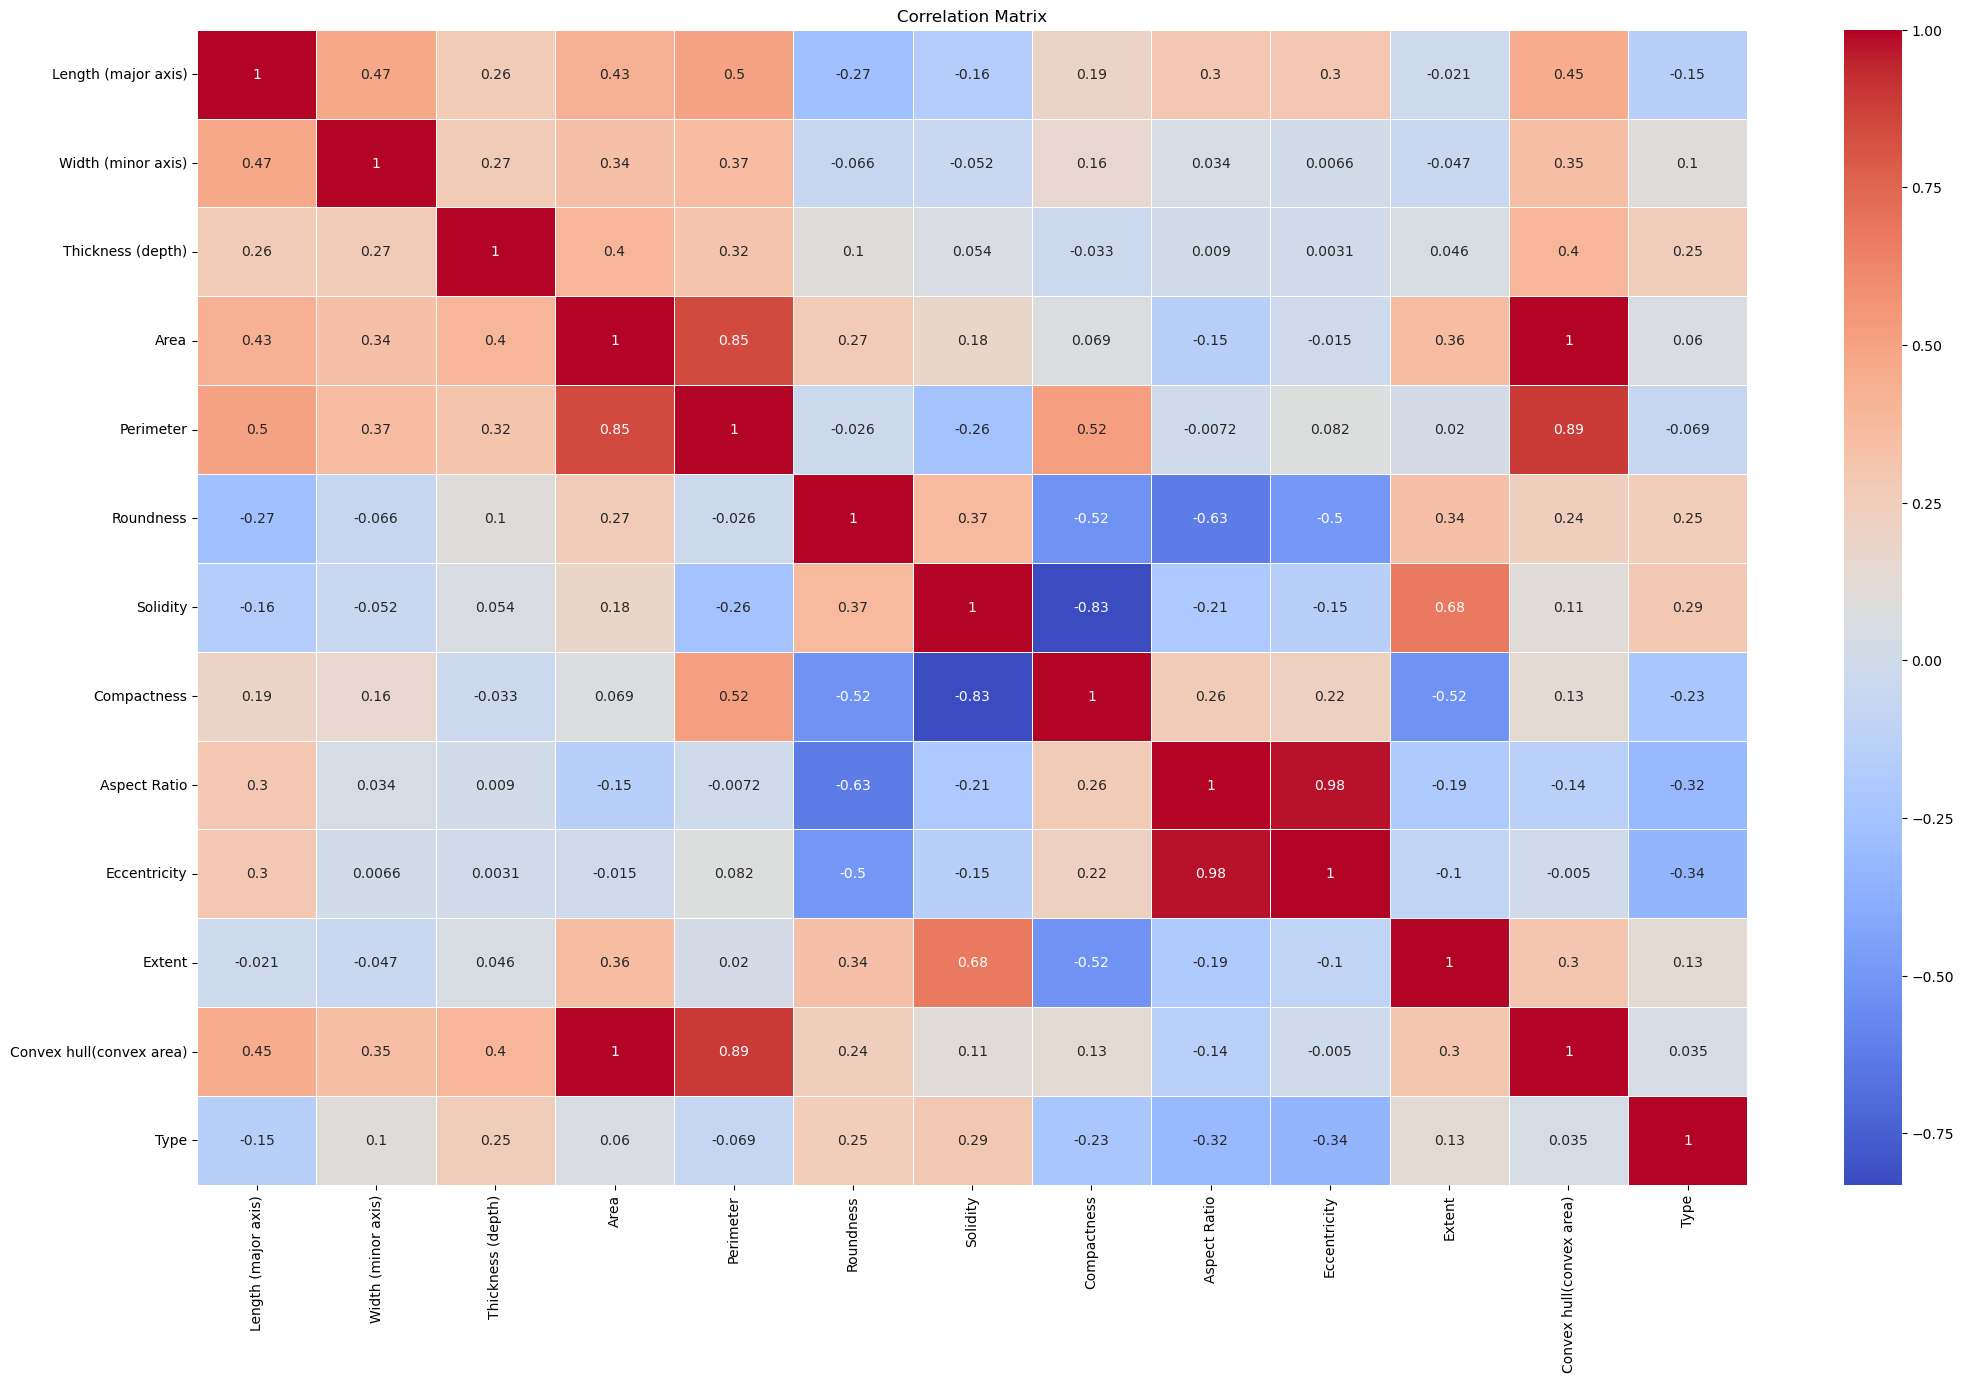

In [42]:
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Defining X ('Feature') and y ('Target')

In [43]:
X = data_cleaned.drop(columns=['Type'])
y = data_cleaned['Type']

Splitting Dataset into train and test

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Function to plot the confusion matrix

In [45]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Function to plot feature importance

In [46]:
def plot_feature_importance(model, X_train, model_name):
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    plt.barh(X_train.columns[sorted_idx], feature_importance[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importance - {model_name}")
    plt.show()

#### Bagging Classifier

Bagging Classifier Accuracy: 0.821640903686088
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       287
           1       0.78      0.79      0.78       278
           2       0.79      0.80      0.80       276

    accuracy                           0.82       841
   macro avg       0.82      0.82      0.82       841
weighted avg       0.82      0.82      0.82       841



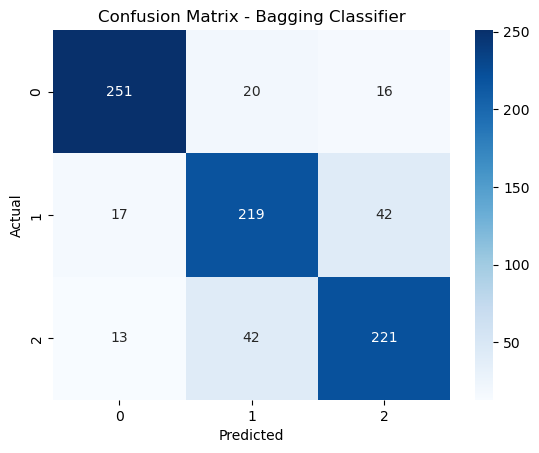

In [48]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)
y_pred_bagging = bagging_model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))
plot_confusion_matrix(y_test, y_pred_bagging, "Bagging Classifier")

#### Random Forest Classifier

Random Forest Classifier Accuracy: 0.8489892984542212
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       287
           1       0.81      0.82      0.82       278
           2       0.82      0.84      0.83       276

    accuracy                           0.85       841
   macro avg       0.85      0.85      0.85       841
weighted avg       0.85      0.85      0.85       841



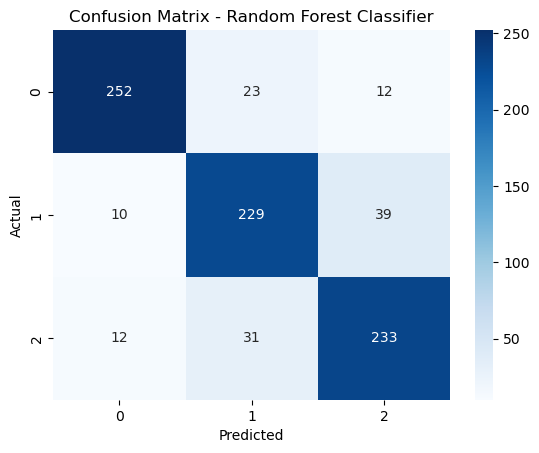

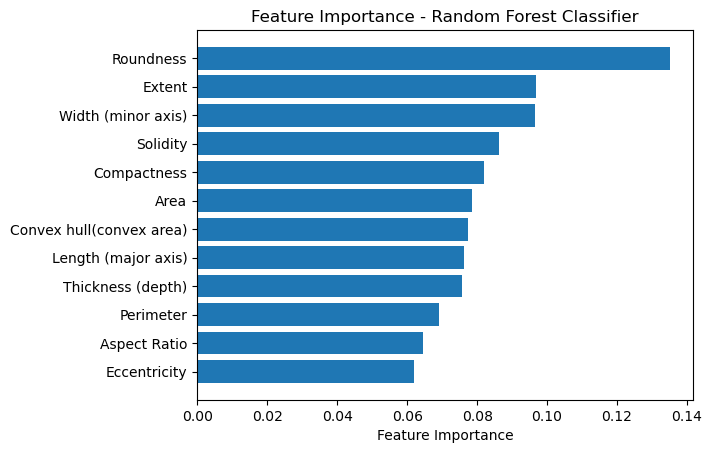

In [53]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_random_forest_prob = random_forest_model.predict_proba(X_test)[:, 1]
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print(classification_report(y_test, y_pred_random_forest))
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest Classifier")
plot_feature_importance(random_forest_model, X_train, "Random Forest Classifier")

#### AdaBoost Classifier

AdaBoost Classifier Accuracy: 0.6777645659928656
              precision    recall  f1-score   support

           0       0.86      0.76      0.81       287
           1       0.59      0.56      0.58       278
           2       0.61      0.71      0.66       276

    accuracy                           0.68       841
   macro avg       0.69      0.68      0.68       841
weighted avg       0.69      0.68      0.68       841



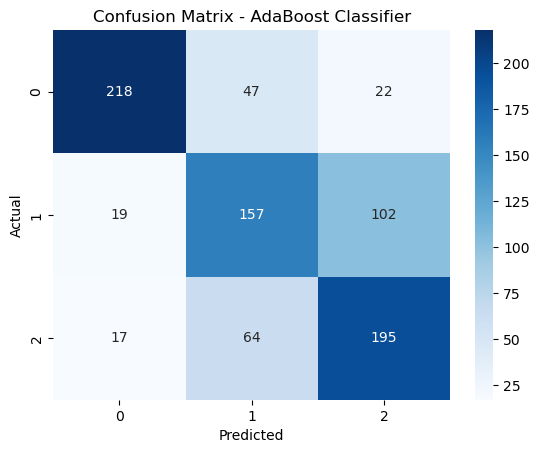

In [52]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)
y_pred_adaboost = adaboost_model.predict(X_test)
y_pred_adaboost_prob = adaboost_model.predict_proba(X_test)[:, 1]
print("AdaBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_adaboost))
print(classification_report(y_test, y_pred_adaboost))
plot_confusion_matrix(y_test, y_pred_adaboost, "AdaBoost Classifier")

#### Gradient Boosting Classifier

Gradient Boosting Classifier Accuracy: 0.7550535077288941
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       287
           1       0.70      0.67      0.69       278
           2       0.69      0.79      0.74       276

    accuracy                           0.76       841
   macro avg       0.76      0.75      0.76       841
weighted avg       0.76      0.76      0.76       841



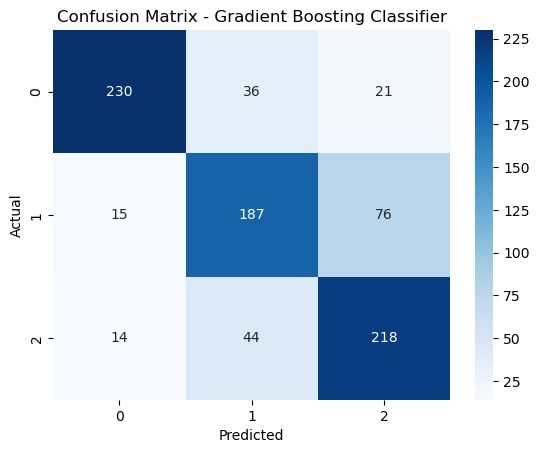

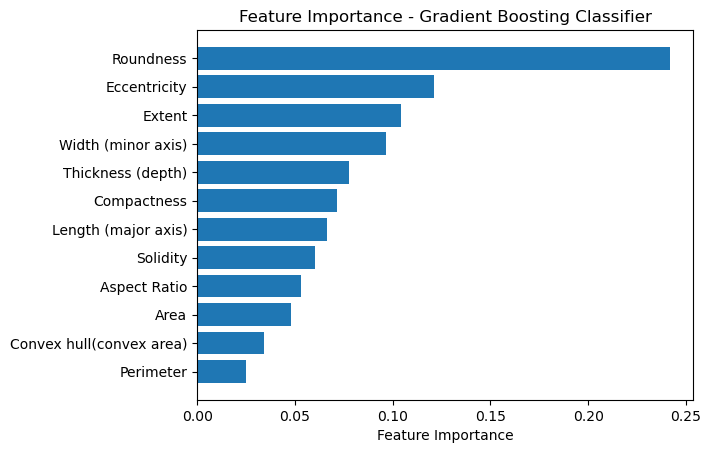

In [51]:

gradientboost_model = GradientBoostingClassifier(random_state=42)
gradientboost_model.fit(X_train, y_train)
y_pred_gradientboost = gradientboost_model.predict(X_test)
y_pred_gradientboost_prob = gradientboost_model.predict_proba(X_test)[:, 1]
print("Gradient Boosting Classifier Accuracy:", accuracy_score(y_test, y_pred_gradientboost))
print(classification_report(y_test, y_pred_gradientboost))
plot_confusion_matrix(y_test, y_pred_gradientboost, "Gradient Boosting Classifier")
plot_feature_importance(gradientboost_model, X_train, "Gradient Boosting Classifier")

Function to print summary

In [55]:
def print_model_summary(model_name, y_test, y_pred):
    print(f"Summary for {model_name}:")
    print("----------------------------")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")

Printing summary of the model

In [56]:
# Bagging Classifier
print_model_summary("Bagging Classifier", y_test, y_pred_bagging)

# AdaBoost Classifier
print_model_summary("AdaBoost Classifier", y_test, y_pred_adaboost)

# Gradient Boosting Classifier
print_model_summary("Gradient Boosting Classifier", y_test, y_pred_gradientboost)

# Random Forest Classifier
print_model_summary("Random Forest Classifier", y_test, y_pred_random_forest)

Summary for Bagging Classifier:
----------------------------
Accuracy: 0.8216
Precision: 0.8224
Recall: 0.8216
F1 Score: 0.8220
Summary for AdaBoost Classifier:
----------------------------
Accuracy: 0.6778
Precision: 0.6872
Recall: 0.6778
F1 Score: 0.6802
Summary for Gradient Boosting Classifier:
----------------------------
Accuracy: 0.7551
Precision: 0.7617
Recall: 0.7551
F1 Score: 0.7565
Summary for Random Forest Classifier:
----------------------------
Accuracy: 0.8490
Precision: 0.8506
Recall: 0.8490
F1 Score: 0.8495
